In [3]:
import Bio

In [4]:
dir(Bio)

['BiopythonDeprecationWarning',
 'BiopythonExperimentalWarning',
 'BiopythonParserWarning',
 'BiopythonWarning',
 'MissingExternalDependencyError',
 'MissingPythonDependencyError',
 'StreamModeError',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_parent_dir',
 'os',
 'warnings']

In [5]:
from Bio.Seq import Seq

In [6]:
dna = Seq("ATGATCTCGTAA")

In [7]:
dna

Seq('ATGATCTCGTAA')

In [17]:
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
dna = Seq("ATGATCTCGTAA")
record = SeqRecord(dna, id="test", annotations={"molecule_type": "DNA"})

In [19]:
record

SeqRecord(seq=Seq('ATGATCTCGTAA'), id='test', name='<unknown name>', description='<unknown description>', dbxrefs=[])

In [20]:
type(dna)

Bio.Seq.Seq

In [21]:
type(record)

Bio.SeqRecord.SeqRecord

In [22]:
print(dna)

ATGATCTCGTAA


In [23]:
dna[0:3]

Seq('ATG')

In [24]:
seq2 = Seq('ATTGTCTCGAA')

In [25]:
dna[0:3] + seq2

Seq('ATGATTGTCTCGAA')

In [26]:
#find nucleotide count
dna.count('A')

4

In [27]:
#find codon (3 Nucleotides)
dna.count('ATG')

1

In [28]:
#length of Sequence
len(dna)

12

In [1]:
import nglview as nv

In [29]:
dna.find('G')

2

In [31]:
dna.count_overlap('GT')

1

In [33]:
dna

Seq('ATGATCTCGTAA')

In [35]:
mRNA = dna.transcribe()
mRNA

Seq('AUGAUCUCGUAA')

In [36]:
#translate
mRNA.translate()

Seq('MIS*')

In [37]:
mRNA.translate(stop_symbol="@")

Seq('MIS@')

In [42]:
dna.complement()

Seq('TACTAGAGCATT')

In [43]:
#reverse Complement
dna.reverse_complement()

Seq('TTACGAGATCAT')

In [44]:
#direct translation to AA
dna.translate()

Seq('MIS*')

In [45]:
mRNA

Seq('AUGAUCUCGUAA')

In [46]:
mRNA.back_transcribe()

Seq('ATGATCTCGTAA')

In [47]:
dna == mRNA.back_transcribe()

True

# What is BioPython?
The Biopython Project is an international association of developers of freely available Python (https://www.python.org) tools for computational molecular biology. Python is an object oriented, interpreted, flexible language that is becoming increasingly popular for scientific computing. Python is easy to learn, has a very clear syntax and can easily be extended with modules written in C, C++ or FORTRAN.

In [48]:
#Covid19
from Bio import SeqIO

The Sequence I am using can be downloaded from http://www.ncbi.nlm.nih.gov/

NCBI is now a leading source for public biomedical databases, software tools for analyzing molecular and genomic data, and research in computational biology. Today NCBI creates and maintains over 40 integrated databases for the medical and scientific communities as well as the general public.

In [50]:
for record in SeqIO.parse("sequence.fasta", "fasta"):
    print(record.id)

MW463452.1


In [51]:
for record in SeqIO.parse("sequence.fasta", "fasta"):
    print(record)

ID: MW463452.1
Name: MW463452.1
Description: MW463452.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/TUN/TUN-20212285/2021, complete genome
Number of features: 0
Seq('TCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAAC...AGG')


In [53]:
ncov_record = SeqIO.read("sequence.fasta", "fasta")

In [54]:
ncov_record

SeqRecord(seq=Seq('TCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAAC...AGG'), id='MW463452.1', name='MW463452.1', description='MW463452.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/TUN/TUN-20212285/2021, complete genome', dbxrefs=[])

# What is DNA?
DNA stands for deoxyribonucleic acid. It's the genetic code that determines all the characteristics of a living thing. ... Each nucleotide contains a sugar and a phosphate molecule, which make up the 'backbone' of DNA, and, one of four organic bases. The bases are adenine (A), guanine (G), cytosine (C) and thymine (T)
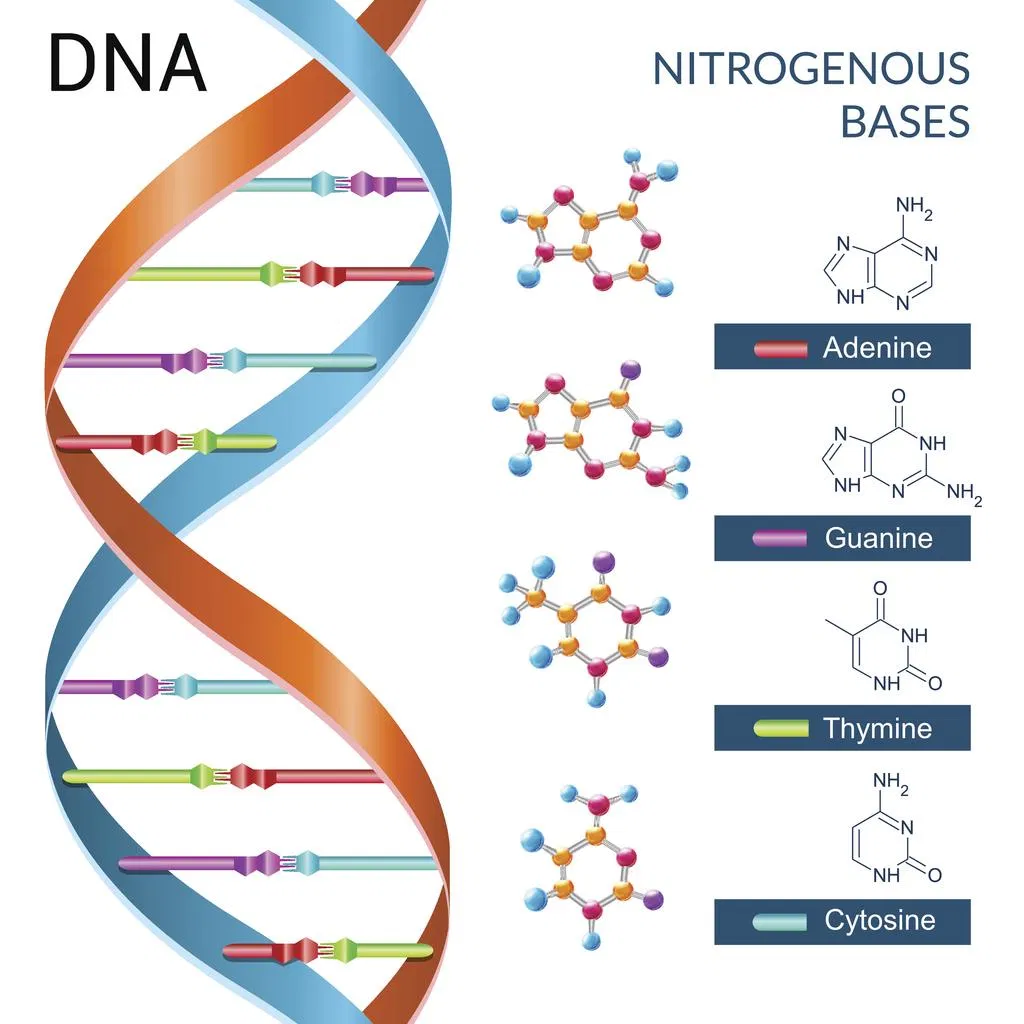

In [133]:
# usually DNA sequences are written in 10-nucleotide fashion
import matplotlib.pyplot as plt
%matplotlib inline
from colorama import Back, Style, Fore
def ten_nucleotide_seq(genome):
    genes = []
    for ix, char in enumerate(genome):
        if ix != 0 and ix%10 == 0:
            genes.append(' ')
        genes.append(char)
    return ''.join(genes)

# color code to represent genome sequences
nu_clr_switcher = {
    # standard color-codes
    'A': Back.GREEN,
    'C': Back.YELLOW,
    'G': Back.RED,
    'T': Back.BLUE,
    ' ': Style.RESET_ALL
}
protein_clr_switcher = {
    # color-code by proteinfamily's polarity
    'A': Back.BLUE,
    'V': Back.BLUE,
    'I': Back.BLUE,
    'L': Back.BLUE,
    'M': Back.BLUE,
    'F': Back.BLUE,
    'Y': Back.CYAN,
    'W': Back.BLUE,
    'H': Back.CYAN,
    'R': Back.RED,
    'K': Back.RED,
    'N': Back.GREEN,
    'Q': Back.GREEN,
    'E': Back.MAGENTA,
    'D': Back.MAGENTA,
    'S': Back.GREEN,
    'T': Back.GREEN,
    'G': Back.YELLOW,
    'P': Back.YELLOW,
    'C': Back.BLUE,
    ' ': Style.RESET_ALL
}
def seq_repr(genome_str, strand ='dna'):
    if strand == 'dna':
        genome_str = ten_nucleotide_seq(genome=genome_str)
        line_break_cntr = 0
        for i in range(len(genome_str)):
            if genome_str[i] == ' ':
                line_break_cntr += 1
                if line_break_cntr>0 and line_break_cntr%6==0:
                    text = "\n"
                else:
                    text = nu_clr_switcher[genome_str[i]] + genome_str[i]
            else:
                text = nu_clr_switcher[genome_str[i]] + genome_str[i]
            print(text, end="")
        Style.RESET_ALL
    if strand == 'protein':
        for i in range(len(genome_str)):
            if genome_str[i] in protein_clr_switcher:
                if genome_str[i] == 'S' and genome_str[i+1:i+4] == 'TOP':
                    text = Style.RESET_ALL + 'S'
                elif genome_str[i] == 'T' and genome_str[i-1] == 'S' and genome_str[i+1:i+3] == 'OP':
                    text = Style.RESET_ALL + 'T'
                elif genome_str[i] == 'P' and genome_str[i-3:i] == 'STO':
                    text = Style.RESET_ALL + 'P'
                else:
                    text = protein_clr_switcher[genome_str[i]] + genome_str[i]
            else:
                Style.RESET_ALL
                text = genome_str[i]
            print(text, end="")

In [55]:
ncov_dna = ncov_record.seq

In [56]:
ncov_dna

Seq('TCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAAC...AGG')

Visualizing the Nucleotides of the Covid19 DNA

In [136]:
from Bio import AlignIO
from Bio.pairwise2 import format_alignment 
from Bio.Align import MultipleSeqAlignment

print("COVID-19 genome: ")
seq_repr(ncov_dna[0:300])

COVID-19 genome: 
TCCCAGGTAA CAAACCAACC AACTTTCGAT CTCTTGTAGA TCTGTTCTCT AAACGAACTT
TAAAATCTGT GTGGCTGTCA CTCGGCTGCA TGCTTAGTGC ACTCACGCAG TATAATTAAT
AACTAATTAC TGTCGTTGAC AGGACACGAG TAACTCGTCT ATCTTCTGCA GGCTGCTTAC
GGTTTCGTCC GTGTTGCAGC CGATCATCAG CACATCTAGG TTTTGTCCGG GTGTGACCGA
AAGGTAAGAT GGAGAGCCTT GTCCCTGGTT TCAACGAGAA AACACACGTC CAACTCAGTT

Total Number of Nucleotides

In [57]:
len(ncov_dna)

29845

# Finding the Composition of each Nucleotide

In [145]:
def nucleotides_composition(seq):
    nucleotides = {'A': 0, 'C': 0, 'G': 0, 'T': 0}
    for n in nucleotides:
        nucleotides[n] = seq.count(n)/len(seq)*100
    return nucleotides

In [147]:
ndict=nucleotides_composition(ncov_dna)
ndict

{'A': 29.81738984754565,
 'C': 18.36153459540962,
 'G': 19.604623890098843,
 'T': 32.125984251968504}

In [151]:
type(ndict)

dict

In [153]:
import pandas as pd
ndf = pd.DataFrame.from_dict(ndict, orient ='index')
ndf

,0
A,29.817390
C,18.361535
G,19.604624
T,32.125984


In [154]:
ndf = ndf.reset_index()
ndf

,index,0
0,A,29.817390
1,C,18.361535
2,G,19.604624
3,T,32.125984


In [157]:
ndf = ndf.rename(columns={"index": "Nucleotide", 0: "Composition"})
ndf

,Nucleotide,Composition
0,A,29.817390
1,C,18.361535
2,G,19.604624
3,T,32.125984


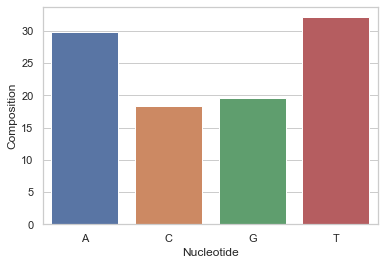

In [158]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Nucleotide", y="Composition", data=ndf)

# Imitating Protein Synthesis
The process by which DNA is copied to RNA is called transcription, and that by which RNA is used to produce proteins is called translation.
Transcription takes place in the nucleus. It uses DNA as a template to make an RNA molecule. RNA then leaves the nucleus and goes to a ribosome in the cytoplasm, where translation occurs. Translation reads the genetic code in mRNA and makes a protein.
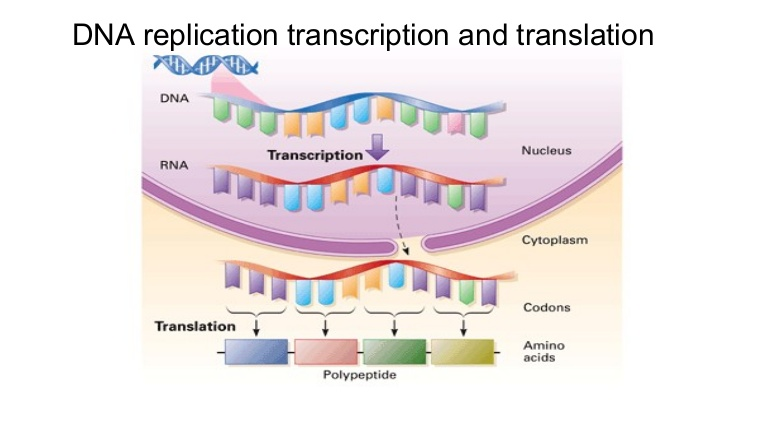

Transcription

In [59]:
#Protein Synthesis
ncov_mrna = ncov_dna.transcribe()
ncov_mrna

Seq('UCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGUAGAUCUGUUCUCUAAAC...AGG')

T is wrtten as U

Translation

In [60]:
ncov_protein = ncov_mrna.translate()
ncov_protein

C:\ProgramData\Anaconda3\lib\site-packages\Bio\Seq.py:2334: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


Seq('SQVTNQPTFDLL*ICSLNEL*NLCGCHSAACLVHSRSIINN*LLSLTGHE*LVY...AS*')

Number of Proteins

In [61]:
len(ncov_protein)

9948

In [62]:
len(ncov_dna)/3

9948.333333333334

In [63]:
#find AA 
ncov_aa = ncov_protein.split("*")
ncov_aa

[Seq('SQVTNQPTFDLL'),
 Seq('ICSLNEL'),
 Seq('NLCGCHSAACLVHSRSIINN'),
 Seq('LLSLTGHE'),
 Seq('LVYLLQAAYGFVRVAADHQHI'),
 Seq('VLSGCDRKVRWRALSLVSTRKHTSNSVCLFYRFATCSYVALETPWRRSYQRHVN...LVA'),
 Seq(''),
 Seq('KLKKASCLNLNSPMCSSNVRMLELHLMVMLWLSW'),
 Seq('QNSKAFSTVVVVRHLVSLSLMWAKYQWLTARFFFVRTVIKELVAIVTAPI'),
 Seq('SHLT'),
 Seq('ATSLALILMKIFKKTGTLNIAVVLPVNSCVSLTEGHTLAMSITTSVALMATLLSALKTF'),
 Seq('HVLVKLHALCPNNWTLLTLRGVYTAAVNMSMKLLGTRNVLKRAMNCRHLLKLNW...YFP'),
 Seq('IP'),
 Seq('SRLFNQGLKRKSLMALWVEFDLSIQLRHQMNATKCAFQLS'),
 Seq('SVIIVVKLHGRRAILLKPLANFVALRI'),
 Seq('LKKVPLLVVTYPKMLLLKFIVQHVTIQK'),
 Seq('DLSIVLPNTIMNLA'),
 Seq('KPFFVRVVALLPLEAVCSLMLVAITSVPIGFHVLALT'),
 Seq('VVTIQVLLEKVPKVLMTTFLKYSKKRKSTSILLVTLNLMKRSPLFWHLFLLPQVLLWKL'),
 Seq('KVWIIKHSNKLLNPVVILKLQKEKLKKVPGILVNRNQY'),
 Seq('VLFMHLHQRLLVLYDQFSPALLKLLKILCVFYRRPL'),
 Seq('QY'),
 Seq('MEFHSIH'),
 Seq('DSLML'),
 Seq('CSHLIWLLTI'),
 Seq('L'),
 Seq('WPTLQVVLFS'),
 Seq('LRSG'),
 Seq('LTSLALFMKNSNPSLIGLKRSLRKV'),
 Seq('SFLETVGKLLNLSQPVLVKLSVDK

Cleaning the List of Proteins

In [66]:
ncov_clean = [ str(i) for i in ncov_aa]

In [67]:
ncov_clean

['SQVTNQPTFDLL',
 'ICSLNEL',
 'NLCGCHSAACLVHSRSIINN',
 'LLSLTGHE',
 'LVYLLQAAYGFVRVAADHQHI',
 'VLSGCDRKVRWRALSLVSTRKHTSNSVCLFYRFATCSYVALETPWRRSYQRHVNILKMALVA',
 '',
 'KLKKASCLNLNSPMCSSNVRMLELHLMVMLWLSW',
 'QNSKAFSTVVVVRHLVSLSLMWAKYQWLTARFFFVRTVIKELVAIVTAPI',
 'SHLT',
 'ATSLALILMKIFKKTGTLNIAVVLPVNSCVSLTEGHTLAMSITTSVALMATLLSALKTF',
 'HVLVKLHALCPNNWTLLTLRGVYTAAVNMSMKLLGTRNVLKRAMNCRHLLKLNWQRNLTPSMGNVQILYFP',
 'IP',
 'SRLFNQGLKRKSLMALWVEFDLSIQLRHQMNATKCAFQLS',
 'SVIIVVKLHGRRAILLKPLANFVALRI',
 'LKKVPLLVVTYPKMLLLKFIVQHVTIQK',
 'DLSIVLPNTIMNLA',
 'KPFFVRVVALLPLEAVCSLMLVAITSVPIGFHVLALT',
 'VVTIQVLLEKVPKVLMTTFLKYSKKRKSTSILLVTLNLMKRSPLFWHLFLLPQVLLWKL',
 'KVWIIKHSNKLLNPVVILKLQKEKLKKVPGILVNRNQY',
 'VLFMHLHQRLLVLYDQFSPALLKLLKILCVFYRRPL',
 'QY',
 'MEFHSIH',
 'DSLML',
 'CSHLIWLLTI',
 'L',
 'WPTLQVVLFS',
 'LRSG',
 'LTSLALFMKNSNPSLIGLKRSLRKV',
 'SFLETVGKLLNLSQPVLVKLSVDKLSPVQRKLRRVFRHSLSL',
 'INFWLCVLTLSLLVELNLKP',
 'I',
 'VKHLSRTQRDCTESVLNPEKKLAYSCL',
 'KPQKKLSS',
 'REKHFPQKC',
 'QRKLS',
 'KLVIYNH',
 'N

Identify all the Proteins (chains of amino acids)

In [89]:
#Identify all the Proteins (chains of amino acids)
Proteins = ncov_protein.split('*')
Proteins

[Seq('SQVTNQPTFDLL'),
 Seq('ICSLNEL'),
 Seq('NLCGCHSAACLVHSRSIINN'),
 Seq('LLSLTGHE'),
 Seq('LVYLLQAAYGFVRVAADHQHI'),
 Seq('VLSGCDRKVRWRALSLVSTRKHTSNSVCLFYRFATCSYVALETPWRRSYQRHVN...LVA'),
 Seq(''),
 Seq('KLKKASCLNLNSPMCSSNVRMLELHLMVMLWLSW'),
 Seq('QNSKAFSTVVVVRHLVSLSLMWAKYQWLTARFFFVRTVIKELVAIVTAPI'),
 Seq('SHLT'),
 Seq('ATSLALILMKIFKKTGTLNIAVVLPVNSCVSLTEGHTLAMSITTSVALMATLLSALKTF'),
 Seq('HVLVKLHALCPNNWTLLTLRGVYTAAVNMSMKLLGTRNVLKRAMNCRHLLKLNW...YFP'),
 Seq('IP'),
 Seq('SRLFNQGLKRKSLMALWVEFDLSIQLRHQMNATKCAFQLS'),
 Seq('SVIIVVKLHGRRAILLKPLANFVALRI'),
 Seq('LKKVPLLVVTYPKMLLLKFIVQHVTIQK'),
 Seq('DLSIVLPNTIMNLA'),
 Seq('KPFFVRVVALLPLEAVCSLMLVAITSVPIGFHVLALT'),
 Seq('VVTIQVLLEKVPKVLMTTFLKYSKKRKSTSILLVTLNLMKRSPLFWHLFLLPQVLLWKL'),
 Seq('KVWIIKHSNKLLNPVVILKLQKEKLKKVPGILVNRNQY'),
 Seq('VLFMHLHQRLLVLYDQFSPALLKLLKILCVFYRRPL'),
 Seq('QY'),
 Seq('MEFHSIH'),
 Seq('DSLML'),
 Seq('CSHLIWLLTI'),
 Seq('L'),
 Seq('WPTLQVVLFS'),
 Seq('LRSG'),
 Seq('LTSLALFMKNSNPSLIGLKRSLRKV'),
 Seq('SFLETVGKLLNLSQPVLVKLSVDK

In [102]:
type(Proteins)

list

Remove chains smaller than 20 amino acids long

In [90]:
#Remove chains smaller than 20 amino acids long
for i in Proteins[:]:
    if len(i) < 20:
        Proteins.remove(i)

# BLAST
In bioinformatics, BLAST is an algorithm and program for comparing primary biological sequence information, such as the amino-acid sequences of proteins or the nucleotides of DNA and/or RNA sequences.

In [91]:
from Bio.Blast import NCBIWWW
result_handle = NCBIWWW.qblast("blastp", "nt", Proteins)

In [104]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [96]:
a=ProteinAnalysis(str(Proteins[0]))

In [97]:
MW=a.molecular_weight()
MW

2112.4165000000003

In [98]:
aromaticity=a.aromaticity()
aromaticity

0.0

In [100]:
AA_Freq=a.count_amino_acids()
AA_Freq

{'A': 2,
 'C': 3,
 'D': 0,
 'E': 0,
 'F': 0,
 'G': 1,
 'H': 2,
 'I': 2,
 'K': 0,
 'L': 2,
 'M': 0,
 'N': 3,
 'P': 0,
 'Q': 0,
 'R': 1,
 'S': 3,
 'T': 0,
 'V': 1,
 'W': 0,
 'Y': 0}

In [101]:
IsoElectric=a.isoelectric_point()
IsoElectric

7.986810874938965

# Calculating GC-content of the DNA
In polymerase chain reaction (PCR) experiments, the GC-content of short oligonucleotides known as primers is often used to predict their annealing temperature to the template DNA. A higher GC-content level indicates a relatively higher melting temperature which correlates to higher stability.

In [88]:
# Now calculating the GC% in the given sequence
from Bio.SeqUtils import GC
print(f"GC% :{GC(ncov_dna)}")

GC% :37.96615848550846


# Protein Analysis 

In [68]:
import pandas as pd
df = pd.DataFrame({"amino_acids":ncov_clean})

In [69]:
df

,amino_acids
0,SQVTNQPTFDLL
1,ICSLNEL
2,NLCGCHSAACLVHSRSIINN
3,LLSLTGHE
4,LVYLLQAAYGFVRVAADHQHI
...,...
742,N
743,F
744,
745,CYPHVILIAS


In [70]:
df['count'] = df['amino_acids'].str.len()

In [71]:
df.head()

,amino_acids,count
0,SQVTNQPTFDLL,12
1,ICSLNEL,7
2,NLCGCHSAACLVHSRSIINN,20
3,LLSLTGHE,8
4,LVYLLQAAYGFVRVAADHQHI,21


In [72]:
df.nlargest(10, "count")

,amino_acids,count
705,SSGLNELNIILVFLFGTLILAMADSNGTITVXELKKLLEQWNLVIG...,243
723,TNMKFLVFLGIITTVAAFHQECSLQSCTQHQPYVVDDPCPIHFYSK...,123
724,TNKLKCLIMDPKISEMHPALRLVDPQIQLAVTRMENAVGRDQNNVG...,105
628,IRRPSPYLLLITLLMLLLKSVNFNFVMIHFWVFITTKTTKVGWKVS...,101
625,SLVSVLILQPELNYPLHTLILSHVVFITLTKFSDPQFYIQLRTCSY...,89
727,IHQKITLAPAILLTMLQSCYNFLKEQHCQKASTQKGAEAAVKPLLV...,87
45,MSGVWLHTTYLMSLVSLNWLHICIVLFTLQMRMKKKVIVKKKSLSH...,82
680,NQGCYSFRFCSRYCNDTDTSLTPFRMAYCWRCTSCCFSERFQNHNP...,82
722,TVHQTRGSSRTLLSNFSYCCGNSVYNTLLHTQKKDRMIELSLIDFY...,79
637,KKESIKLLTLESNQQNLLLDFLILQTCALLVKFLTPPDLHLFMLGT...,78


Considering the Amino Acid of the highest length for the Analysis

In [118]:
#protein of interest
soi=df['amino_acids'].iloc[705]
seq_oi=Seq(soi)
seq_oi

Seq('SSGLNELNIILVFLFGTLILAMADSNGTITVXELKKLLEQWNLVIGFLFLTWIC...LVQ')

In [119]:
#cleaning
soi1=''
for i in soi:
    if(i!='X'):
        soi1=soi1+i
print(len(soi1))
print(soi1)

242
SSGLNELNIILVFLFGTLILAMADSNGTITVELKKLLEQWNLVIGFLFLTWICLLQFAYANRNRFLYIIKLIFLWLLWPVTLACFVLAAVYRINWITGGIAIAMACLVGLMWLSYFIASFRLFARTRSMWSFNPETNILLNVPLHGTILTRPLLESELVIGAVILRGHLRIAGHHLGRCDIKDLPKEITVATSRTLSYYKLGASQRVAGDSGFAAYSRYRIGNYKLNTDHSSSSDNIALLVQ


In [122]:
a=ProteinAnalysis(soi1)
a

Molecular Weight

In [123]:
MW=a.molecular_weight()
MW

27246.84670000003

Aromaticity

In chemistry, aromaticity is a property of cyclic (ring-shaped), planar (flat) structures with pi bonds in resonance (those containing delocalized electrons) that gives increased stability compared to other geometric or connective arrangements with the same set of atoms. Aromatic rings are very stable and do not break apart easily. Organic compounds that are not aromatic are classified as aliphatic compounds—they might be cyclic, but only aromatic rings have enhanced stability.
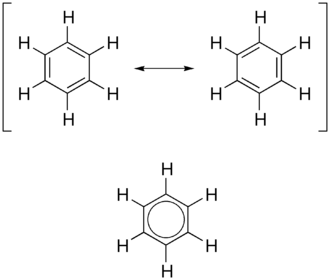

In [124]:
aromaticity=a.aromaticity()
aromaticity

0.11983471074380166

IsoElectric Point

The isoelectric point (pI) is the pH value at which the molecule carries no electrical charge. The concept is particularly important for zwitterionic molecules such as amino acids, peptides, and proteins.
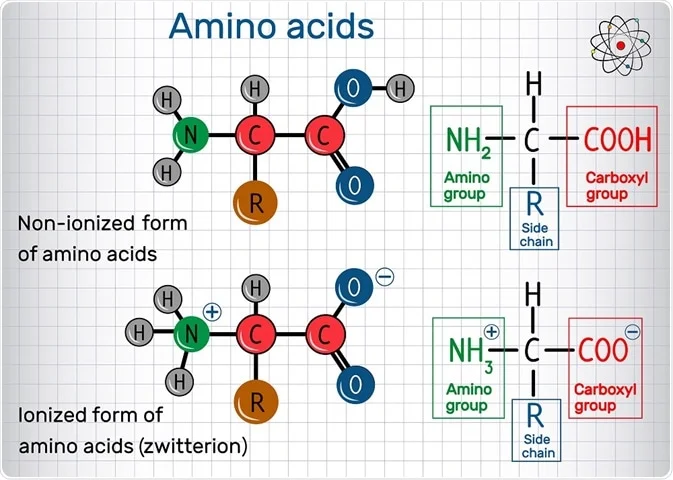

In [125]:
IsoElectric=a.isoelectric_point()
IsoElectric

9.509038352966307

In [73]:
#count the frequency of Amino Acid
from collections import Counter

In [74]:
Counter(ncov_protein).most_common(10)

[('L', 1637),
 ('*', 746),
 ('S', 702),
 ('V', 674),
 ('T', 621),
 ('I', 581),
 ('K', 518),
 ('C', 471),
 ('R', 462),
 ('F', 459)]

In [39]:
#View Codon Table
from Bio.Data import CodonTabl
dir(CodonTable)

['AmbiguousCodonTable',
 'AmbiguousForwardTable',
 'CodonTable',
 'IUPACData',
 'NCBICodonTable',
 'NCBICodonTableDNA',
 'NCBICodonTableRNA',
 'TranslationError',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'ambiguous_dna_by_id',
 'ambiguous_dna_by_name',
 'ambiguous_generic_by_id',
 'ambiguous_generic_by_name',
 'ambiguous_rna_by_id',
 'ambiguous_rna_by_name',
 'generic_by_id',
 'generic_by_name',
 'list_ambiguous_codons',
 'list_possible_proteins',
 'make_back_table',
 'register_ncbi_table',
 'standard_dna_table',
 'standard_rna_table',
 'unambiguous_dna_by_id',
 'unambiguous_dna_by_name',
 'unambiguous_rna_by_id',
 'unambiguous_rna_by_name']

In [40]:
print(CodonTable.unambiguous_dna_by_name['Standard'])

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [41]:
print(CodonTable.unambiguous_rna_by_name['Standard'])

Table 1 Standard, SGC0

  |  U      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
U | UUU F   | UCU S   | UAU Y   | UGU C   | U
U | UUC F   | UCC S   | UAC Y   | UGC C   | C
U | UUA L   | UCA S   | UAA Stop| UGA Stop| A
U | UUG L(s)| UCG S   | UAG Stop| UGG W   | G
--+---------+---------+---------+---------+--
C | CUU L   | CCU P   | CAU H   | CGU R   | U
C | CUC L   | CCC P   | CAC H   | CGC R   | C
C | CUA L   | CCA P   | CAA Q   | CGA R   | A
C | CUG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | AUU I   | ACU T   | AAU N   | AGU S   | U
A | AUC I   | ACC T   | AAC N   | AGC S   | C
A | AUA I   | ACA T   | AAA K   | AGA R   | A
A | AUG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GUU V   | GCU A   | GAU D   | GGU G   | U
G | GUC V   | GCC A   | GAC D   | GGC G   | C
G | GUA V   | GCA A   | GAA E   | GGA G   | A
G | GUG V   | GCG A   | GAG E   | GGG G   | G
--+---------

# Tri-nucleotide compositions (Tri-mer)

In [137]:
# tri-nucleotide compositions
trimers = ["AAA", "AAC", "AAG", "AAT", "ACA", "ACC", "ACG", "ACT", "AGA", "AGC", "AGG", "ATA", "ATC", "ATG", "CAA", 
           "CAC", "CAG", "CCA","CCC","CCG","CGA","CGC","CTA","CTC","GAA","GAC","GCA","GCC","GGA","GTA","TAA","TCA"]

def trimer_composition(genome):
    trimer_dict = dict()
    for trimer in trimers:
        trimer_dict[trimer] = genome.count(trimer)
    return trimer_dict

In [138]:
composition = trimer_composition(ncov_dna)
total_composition = sum(composition.values())
norm_freq = [count/total_composition for count in composition.values()]
print(composition)
print(total_composition)
print(norm_freq)

{'AAA': 641, 'AAC': 615, 'AAG': 575, 'AAT': 760, 'ACA': 754, 'ACC': 371, 'ACG': 164, 'ACT': 674, 'AGA': 567, 'AGC': 300, 'AGG': 328, 'ATA': 446, 'ATC': 339, 'ATG': 722, 'CAA': 702, 'CAC': 427, 'CAG': 437, 'CCA': 353, 'CCC': 102, 'CCG': 73, 'CGA': 95, 'CGC': 94, 'CTA': 555, 'CTC': 270, 'GAA': 531, 'GAC': 338, 'GCA': 371, 'GCC': 188, 'GGA': 280, 'GTA': 468, 'TAA': 717, 'TCA': 550}
13807
[0.046425726080973416, 0.04454262330701818, 0.04164554211631781, 0.05504454262330702, 0.054609980444701965, 0.026870428043745925, 0.011878032881871515, 0.04881581806330122, 0.041066125878177734, 0.02172810893025277, 0.02375606576374303, 0.032302455276309115, 0.02455276309118563, 0.05229231549214167, 0.05084377489679148, 0.030926341710726443, 0.03165061200840154, 0.02556674150793076, 0.007387557036285942, 0.005287173173028174, 0.006880567827913377, 0.006808140798145868, 0.040197001520967626, 0.019555298037227494, 0.038458752806547404, 0.024480336061418122, 0.026870428043745925, 0.013616281596291736, 0.0202

In [159]:
tri = pd.DataFrame.from_dict(composition, orient ='index')
tri = tri.reset_index()
tri = tri.rename(columns={"index": "trimer", 0: "count"})
tri

,trimer,count
0,AAA,641
1,AAC,615
2,AAG,575
3,AAT,760
4,ACA,754
5,ACC,371
6,ACG,164
7,ACT,674
8,AGA,567
9,AGC,300


In [171]:
r1 = tri.sort_values(by='count', ascending=False)
r1.style.bar(subset=["count"],color='#').background_gradient(cmap='Reds')

,trimer,count
3,AAT,760
4,ACA,754
13,ATG,722
30,TAA,717
14,CAA,702
7,ACT,674
0,AAA,641
1,AAC,615
2,AAG,575
8,AGA,567


<AxesSubplot:xlabel='count', ylabel='trimer'>

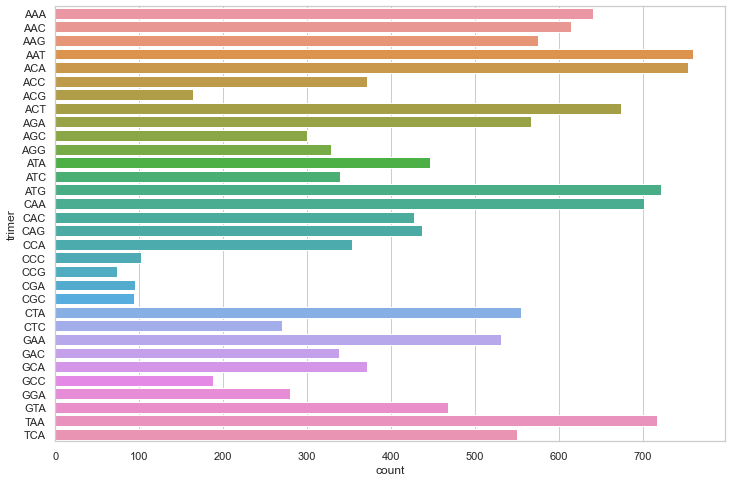

In [164]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="count", y="trimer", ax=ax, data=tri)

# Amino Acid Composition

In [139]:
def amino_acid_composition(protein_seq):
    amino_acids_dict = {'Y': 0, 'A': 0, 'Q': 0, 'D': 0, 'C': 0, 'G': 0, 'V': 0, 'T': 0, 'E': 0, 'N': 0, 
                       'K': 0, 'R': 0, 'S': 0, 'I': 0, 'H': 0, 'M': 0, 'F': 0, 'L': 0, 'W': 0, 'P': 0}
    for amino_acid in amino_acids_dict:
        amino_acids_dict[amino_acid] = protein_seq.count(amino_acid)/len(protein_seq)*100
    return amino_acids_dict

In [140]:
ac = amino_acid_composition(ncov_protein)
ac

{'Y': 3.3273019702452755,
 'A': 2.613590671491757,
 'Q': 4.091274628065943,
 'D': 1.336952151186168,
 'C': 4.734620024125452,
 'G': 2.3220747889022917,
 'V': 6.775231202251709,
 'T': 6.242460796139928,
 'E': 1.9099316445516688,
 'N': 4.010856453558504,
 'K': 5.2070767993566545,
 'R': 4.644149577804583,
 'S': 7.056694813027745,
 'I': 5.840369923602734,
 'H': 3.689183755528749,
 'M': 2.9754724567752313,
 'F': 4.613992762364294,
 'L': 16.45556895858464,
 'W': 1.9300361881785282,
 'P': 2.6035383996783272}

In [165]:
amc = pd.DataFrame.from_dict(ac, orient ='index')
amc = amc.reset_index()
amc = amc.rename(columns={"index": "amino_acid", 0: "composition"})
amc

,amino_acid,composition
0,Y,3.327302
1,A,2.613591
2,Q,4.091275
3,D,1.336952
4,C,4.734620
5,G,2.322075
6,V,6.775231
7,T,6.242461
8,E,1.909932
9,N,4.010856


In [168]:
r = amc.sort_values(by='composition', ascending=False)
r.style.bar(subset=["composition"],color='#').background_gradient(cmap='Purples')

,amino_acid,composition
17,L,16.455569
12,S,7.056695
6,V,6.775231
7,T,6.242461
13,I,5.840370
10,K,5.207077
4,C,4.734620
11,R,4.644150
16,F,4.613993
2,Q,4.091275


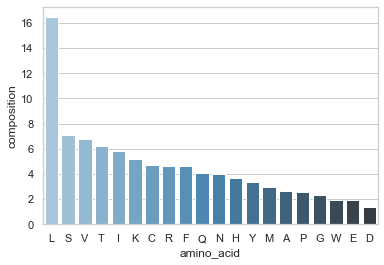

In [170]:
ax = sns.barplot(x="amino_acid", y="composition", data=r,
                 palette="Blues_d")

# Finding the ORF
In molecular genetics, an open reading frame is the part of a reading frame that has the ability to be translated. An ORF is a continuous stretch of codons that begins with a start codon and ends at a stop codon. An ATG codon within the ORF may indicate where translation starts.
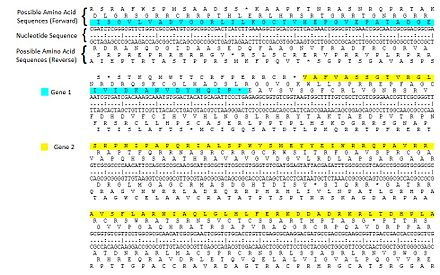

In [142]:
#ORF
orf_strands = []
# generate ORFs
for seq in ncov_protein.split("STOP"):
    for nu in range(len(seq)-1, -1, -1):
        if seq[nu] == "M":
            orf_strands.append(seq[nu:]+"STOP")

orf_strands    

[Seq('M*LTLISHSNL*SVCNIREDLKEPPHFHRGHAEYDRVYSEQC*GELPIWKSPNV...TOP'),
 Seq('MQTTQGRWAI*TFSLFRLRYIVYSCAE*ILVTT*HN*M*LTLISHSNL*SVCNI...TOP'),
 Seq('MISPNNCNNP*AVLTQLRPKLMQTTQGRWAI*TFSLFRLRYIVYSCAE*ILVTT...TOP'),
 Seq('MKLKPYRRDRRNSKL*LFFLLQIWMISPNNCNNP*AVLTQLRPKLMQTTQGRWA...TOP'),
 Seq('MTKIQISKIKSFC*ISILTHTKHSHQQSLKRTKRRRLMKLKPYRRDRRNSKL*L...TOP'),
 Seq('M*HKLSADVVQNKPKEILGTRN*SDKELITNIGRKLHNLPPALQRSSECRALAW...TOP'),
 Seq('MLLLFCCCLTD*TSLRAKCLVKANNNKAKLSLRNLLLRLLRSLGKNVLPLKHTM...TOP'),
 Seq('MAVMLLLFCCCLTD*TSLRAKCLVKANNNKAKLSLRNLLLRLLRSLGKNVLPLK...TOP'),
 Seq('MLQSCYNFLKEQHCQKASTQKGAEAAVKPLLVPHHVVATVQEIQLQAAVGELLL...TOP'),
 Seq('MVLTKTASYGLQLREP*IHQKITLAPAILLTMLQSCYNFLKEQHCQKASTQKGA...TOP'),
 Seq('MTKLATTEELPDEFVVVTVK*KISVQDGISTT*ELGQKLDFPMVLTKTASYGLQ...TOP'),
 Seq('MARKTLNSLEDKAFQLTPIAVQMTKLATTEELPDEFVVVTVK*KISVQDGISTT...TOP'),
 Seq('MENAVGRDQNNVGPKVYPIILRLGSPLSLNMARKTLNSLEDKAFQLTPIAVQMT...TOP'),
 Seq('MHPALRLVDPQIQLAVTRMENAVGRDQNNVGPKVYPIILRLGSPLSLNMARKTL...TOP'),
 Seq('MDPKISEMHPALRL

Total Number of ORF Strands

In [143]:
len(orf_strands)

296

In [2]:
nv.demo()

NGLWidget()

In [75]:
from Bio.PDB import PDBParser

In [76]:
parser = PDBParser()
structure = parser.get_structure("6lu7", "6lu7.pdb")

C:\ProgramData\Anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2809.
  warnings.warn(


In [77]:
structure

<Structure id=6lu7>

In [78]:
len(structure)

1

In [79]:
model = structure[0]

In [80]:
for chain in model:
    print(chain)

<Chain id=A>
<Chain id=C>


In [81]:
import nglview as nv

In [82]:
#Covid 3d structure
view = nv.show_biopython(structure)

In [83]:
view

NGLWidget()

In [84]:
import py3Dmol

In [85]:
view2 = py3Dmol.view(query='6LU7')

In [86]:
view2.setStyle({'cartoon':{'color':'spectrum'}})

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [87]:
view2.render_image()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol